In [10]:
#Importação de bibliotecas necessárias para o projeto
import numpy as np
import pandas as pd
from IPython.display import display # Permite o uso de display() para DataFrames
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import scipy as scipy
import missingno as msno
from scipy.stats.stats import pearsonr
from collections import Counter
import seaborn as sns
from sklearn.model_selection import cross_val_score #cross-validation
from sklearn import metrics
# Pretty display for notebooks
%matplotlib inline

# Carregando os conjuntos de dados de treinamento e teste
full_data = pd.read_csv('train_Porto_Seguro.csv') 
full_data_test= pd.read_csv('test_Porto_Seguro.csv')

# Imprime as primeiras entradas dos datasets
display(full_data.head(10))
display(full_data_test.head(10))

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
5,5,0,1,6,0,0,1,0,0,0,...,8,1,4,9,1,0,1,0,1,0
6,6,0,1,3,0,0,0,1,0,0,...,2,0,4,6,1,1,0,0,0,0
7,8,0,1,0,0,0,1,0,0,0,...,3,1,4,9,0,1,0,0,0,0
8,10,0,1,7,0,0,0,1,0,0,...,5,1,4,6,0,0,1,0,0,0
9,11,1,1,6,0,0,0,0,0,1,...,6,1,6,10,0,1,1,0,0,0


In [11]:
# Padronização da impressão dos gráficos
padrao={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [20, 8], 'axes.labelsize': 18,\
   'axes.titlesize': 18, 'font.size': 18, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 15,\
   'xtick.labelsize': 12, 'ytick.labelsize': 16} 
 
sns.set(style='dark',rc=padrao) 

### Função grafico_auc - retorna o gráfico com a curva AUC e seu valor.

In [12]:
def grafico_auc(modelo):
    #Utilização da função predict.proba para obter estimativas de incerteza para o classificador.
    fpr, tpr, _ = metrics.roc_curve(y_test, modelo.predict_proba(X_test)[:,1])

    # Cálculo da métrica AUC
    auc = cross_val_score(modelo, X_test, y_test, cv=5, scoring='roc_auc')
    roc_auc=auc.mean()

    # Gráfico da curva ROC
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC(Area Under The Curve)')
    plt.legend(loc="lower right")
    plt.show()

### Função pontuação - retorna as pontuações dos folds da validação cruzada;a pontuação de AUC e GINI

In [13]:
def pontuacao(modelo):
    #Alteração do parâmetro cv=5 e scoring="roc_auc).
    auc = cross_val_score(modelo, X_test, y_test, cv=5, scoring='roc_auc')

    #Calculando a média dos 5 folds construídos na etapa anterior.
    media=auc.mean()
    
    #Print das pontuações
    print("Pontuações da Validação Cruzada: {}".format(auc))
    print("Pontuação AUC: {:.3f}".format(media))
    print("Pontuação Gini: " , 2 * media - 1)


### IMPLEMENTAÇÂO - Preparação dos dados

In [14]:
#Armazendo na váriavel X todas as colunas, exceto a da variável alvo "target" e "id" que são 
#números de identificação ordenados que visam substituir o identificador do cliente.
conjunto_treinamento = full_data.drop(['target',"id"], axis=1)
conjunto_teste = full_data['target']

### DIVISÂO DOS DADOS - conjunto de treinamento e conjunto de teste

In [15]:
#importação da técnica StratifiedKFold
from sklearn.model_selection import StratifiedKFold

X = np.array(conjunto_treinamento)
y = np.array(conjunto_teste)

#Divisão do conjunto de dados de treinamento em: conjunto de treinamento e teste
skf = StratifiedKFold(n_splits=3,random_state=2017,shuffle=True)

for train_index, test_index in skf.split(X, y): #split é tipo train_test_split. dividindo os datasets em train e test
    print("train:", train_index, "Train:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

train: [     0      1      2 ..., 595208 595210 595211] Train: [     3      4      8 ..., 595203 595206 595209]
train: [     2      3      4 ..., 595209 595210 595211] Train: [     0      1      7 ..., 595204 595207 595208]
train: [     0      1      3 ..., 595207 595208 595209] Train: [     2      5      6 ..., 595205 595210 595211]


### IMPORTAÇÃO DO ALGORITMO RANDOMFOREST

In [16]:
from sklearn.ensemble import RandomForestClassifier

### TREINAMENTO DO MODELOS - RF1, RF2,RF3 e RF4

In [17]:
#Criação do primeiro classificador. 
modelo_rf1 = RandomForestClassifier(random_state=2017)

#Treinamento do modelo com a utilização do conjunto de dados de treinamento
modelo_rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=2017,
            verbose=0, warm_start=False)

In [18]:
pontuacao(modelo_rf1)

Pontuações da Validação Cruzada: [ 0.53217105  0.53064816  0.54014597  0.53851772  0.52838649]
Pontuação AUC: 0.534
Pontuação Gini:  0.0679477536508


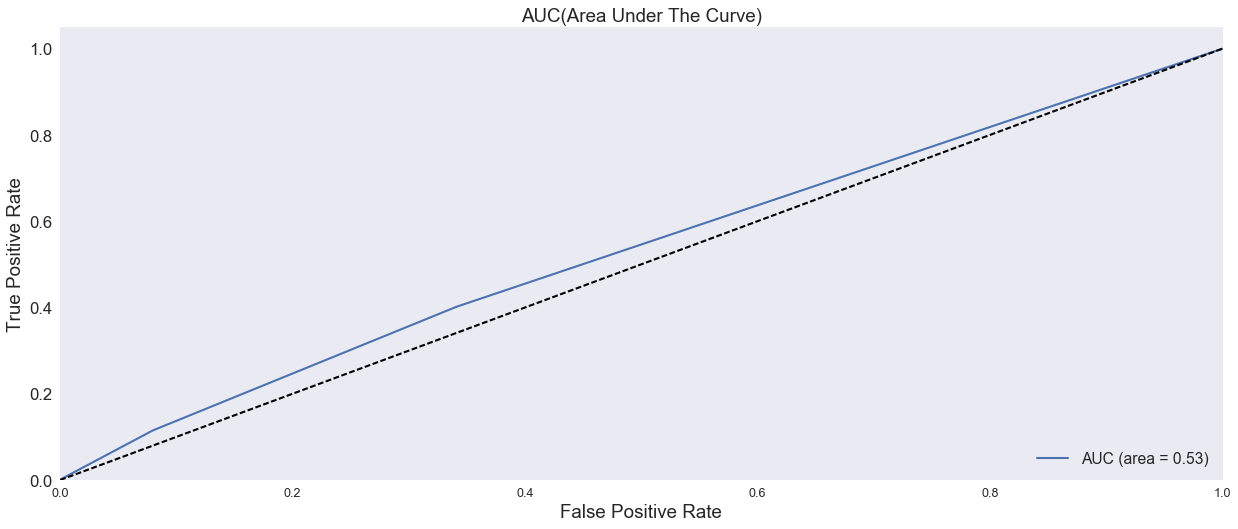

In [19]:
grafico_auc(modelo_rf1)

In [20]:
#Utilização da função predict.proba para obter estimativas de incerteza para o classificador.Como é uma probabibilidade,
#o output do predict_proba é sempre entre 0 e 1, e a soma das entradas para ambas classes é sempre 1.

# mostras as primeiras entradas da função predict_proba 
print("Probabilidades Preditivas:\n{}".format(modelo_rf1.predict_proba(X_test)[:6])) 
# mostrar que todas as somas entre as linhas é 1 
print("Soma: {}".format(modelo_rf1.predict_proba(X_test)[:6].sum(axis=1)))

Probabilidades Preditivas:
[[ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.9  0.1]
 [ 1.   0. ]
 [ 1.   0. ]]
Soma: [ 1.  1.  1.  1.  1.  1.]


In [21]:
#RandomForest params 
parametros_rf = {'n_estimators':100, 
                 'max_depth': 6 ,
                 'min_samples_split': 60, 
                 'min_samples_leaf': 25,
                 'random_state':2017
            } 

In [22]:
modelo_rf2 = RandomForestClassifier(**parametros_rf)
modelo_rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=2017,
            verbose=0, warm_start=False)

In [23]:
pontuacao(modelo_rf2)

Pontuações da Validação Cruzada: [ 0.62331197  0.61960635  0.62787607  0.62304929  0.61981799]
Pontuação AUC: 0.623
Pontuação Gini:  0.245464667613


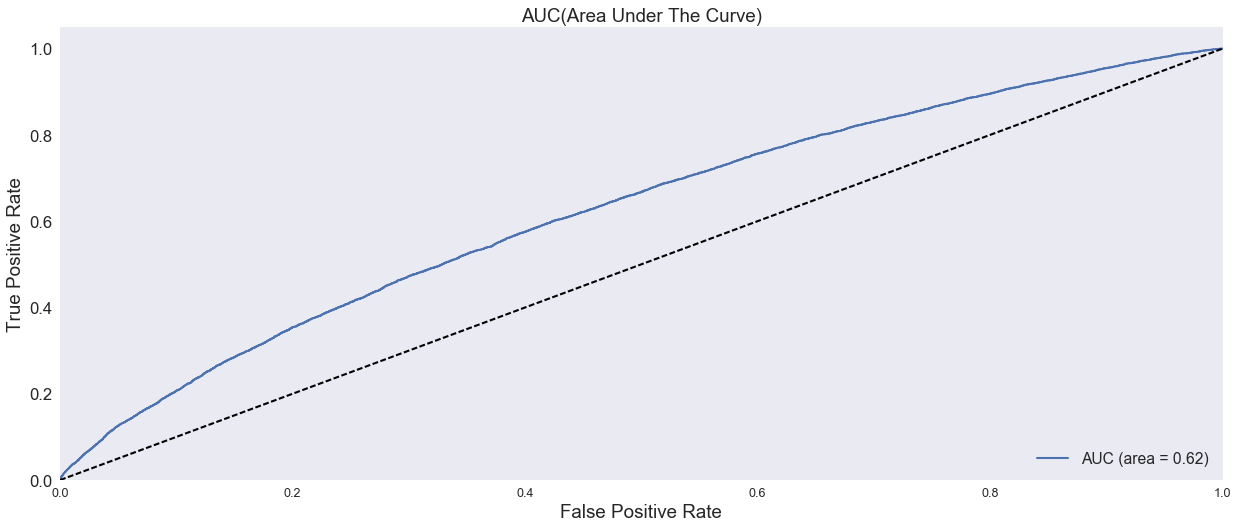

In [24]:
grafico_auc(modelo_rf2)

In [25]:
#Modificação dos parâmetros
parametros_rf = {'n_estimators':200, 
                 'max_depth': 6 ,
                 'min_samples_split': 60, 
                 'min_samples_leaf': 25,
                 'random_state':2017
            } 

In [26]:
#Treinamento do modelo_rf3
modelo_rf3 = RandomForestClassifier(**parametros_rf)
modelo_rf3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=2017,
            verbose=0, warm_start=False)

In [27]:
#Resultado do modelo_rf3
pontuacao(modelo_rf3)

Pontuações da Validação Cruzada: [ 0.62479525  0.6197583   0.62813747  0.62359382  0.62131187]
Pontuação AUC: 0.624
Pontuação Gini:  0.247038682662


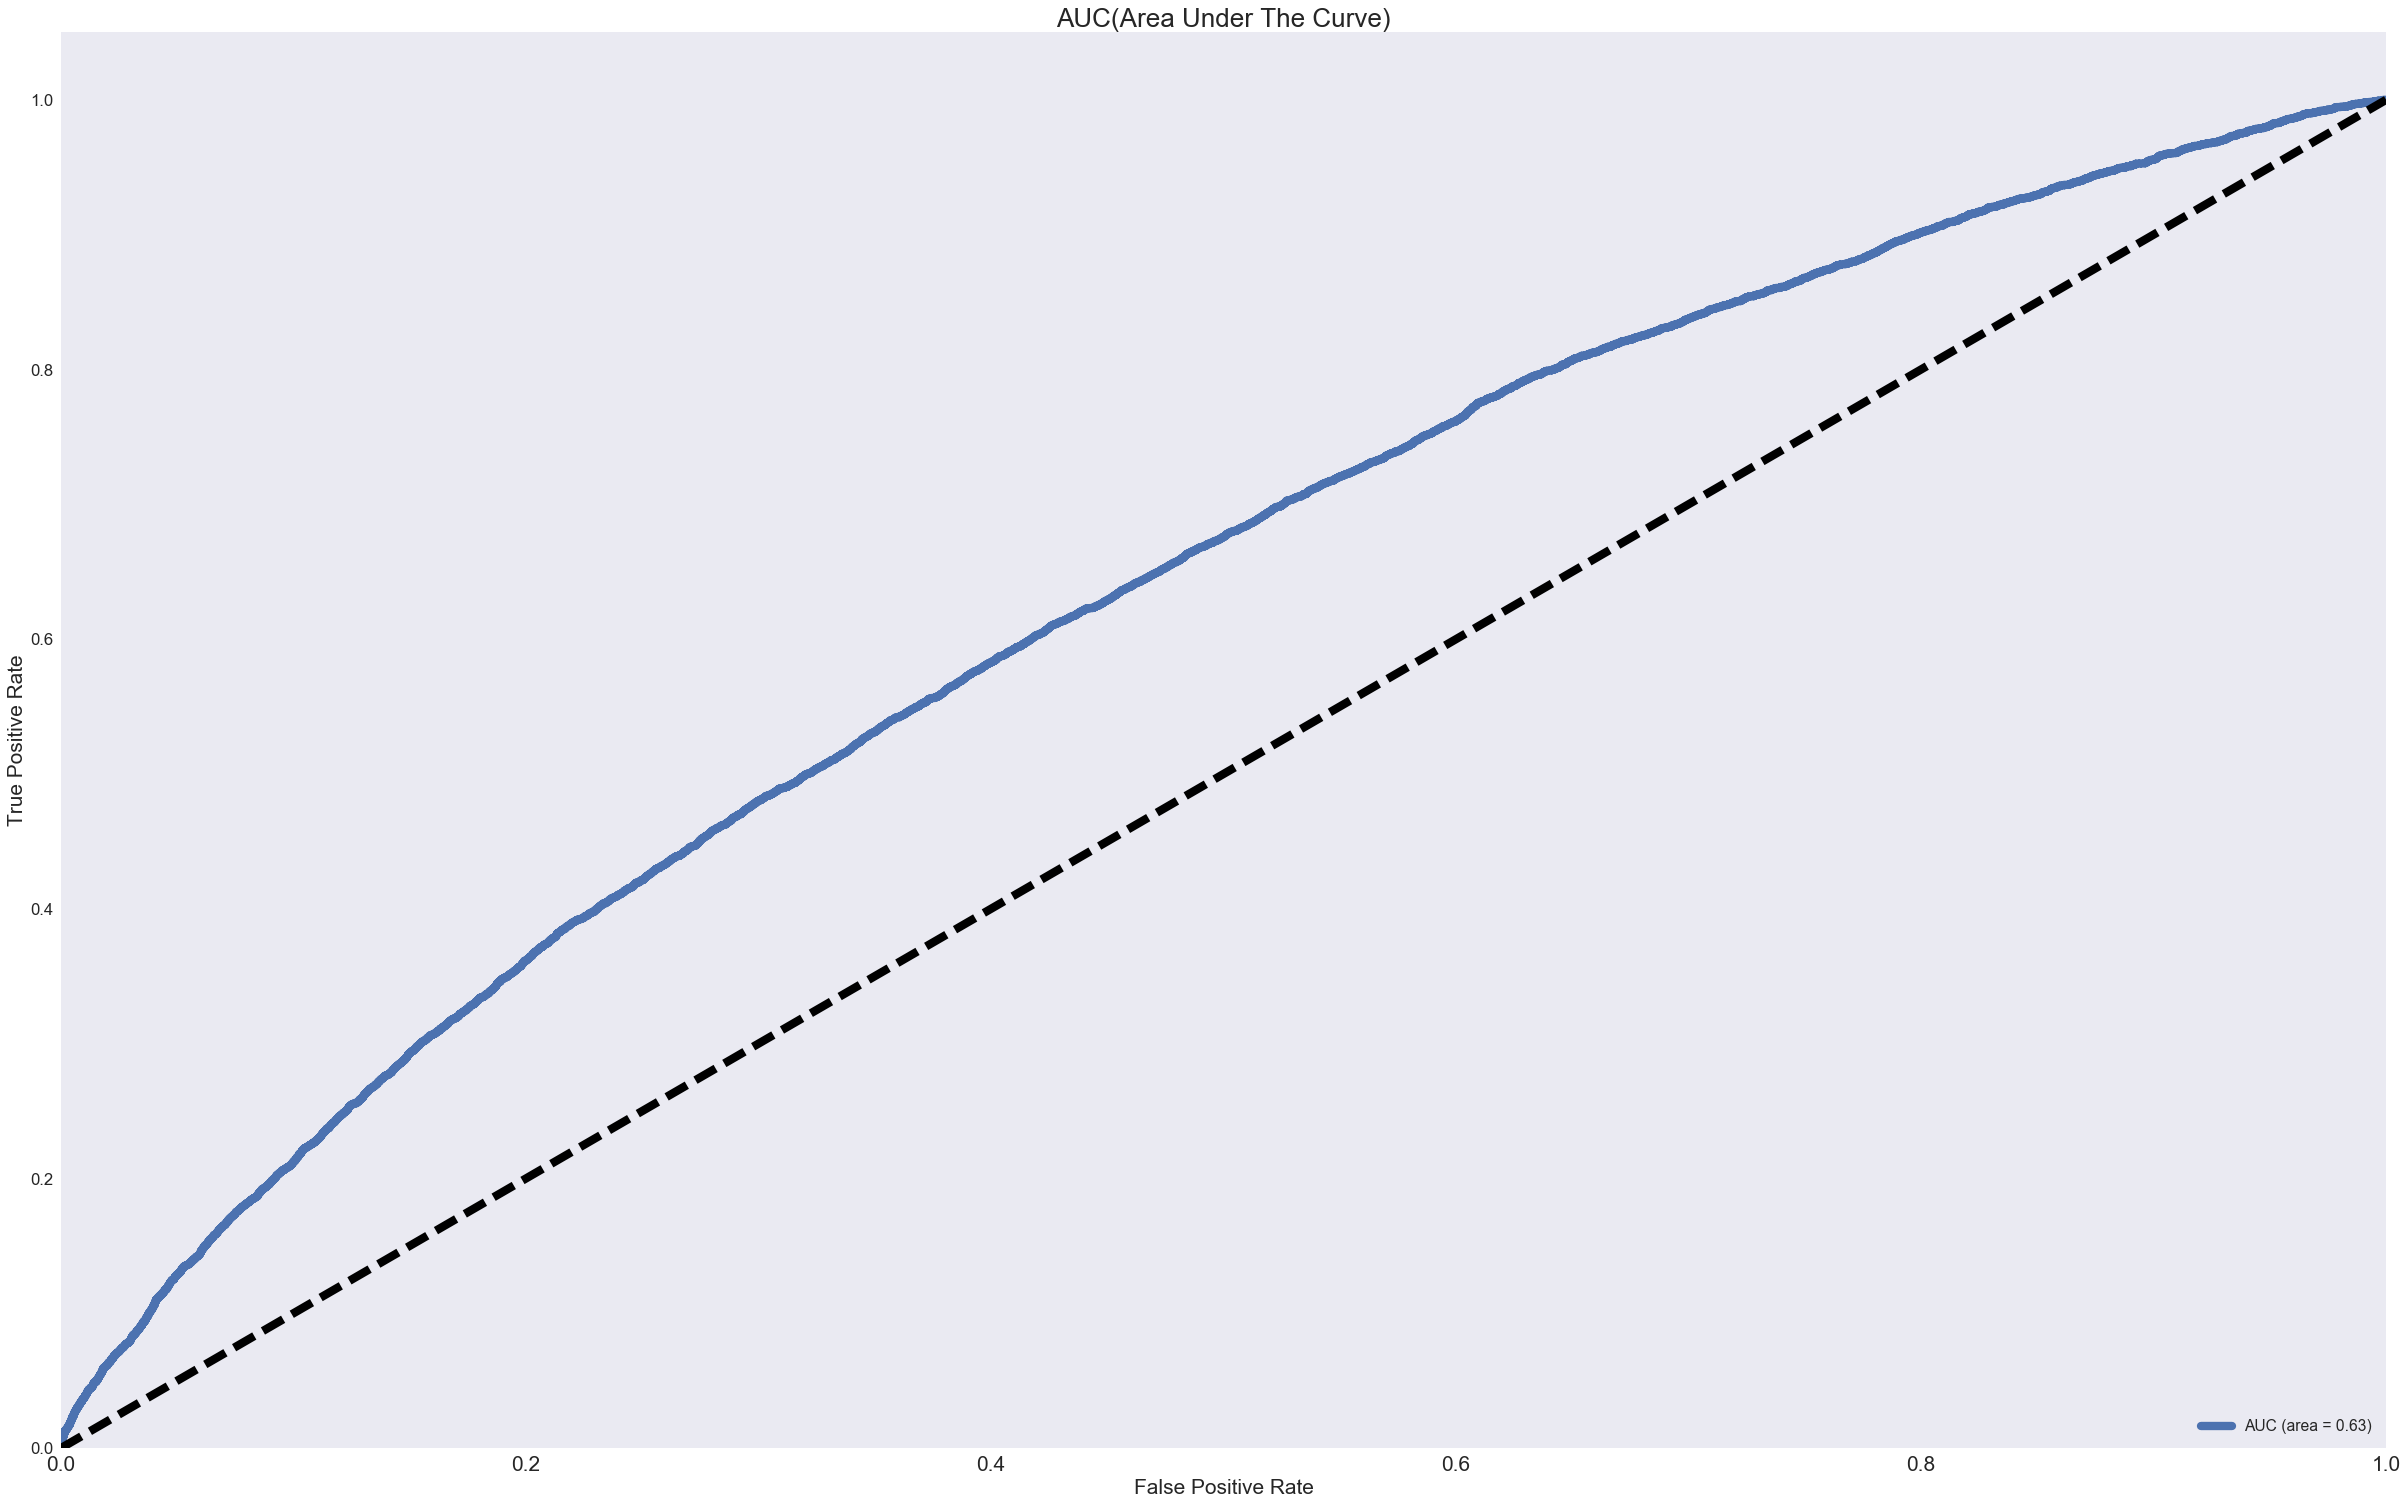

In [75]:
grafico_auc(modelo_rf3)

In [29]:
#Modificação dos parâmetros
parametros_rf = {'n_estimators':300, 
                 'max_depth': 6 ,
                 'min_samples_split': 60, 
                 'min_samples_leaf': 25,
                 'random_state':2017
            } 

In [30]:
#Treinamento do modelo_rf3
modelo_rf4 = RandomForestClassifier(**parametros_rf)
modelo_rf4.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=2017,
            verbose=0, warm_start=False)

In [31]:
pontuacao(modelo_rf4)

Pontuações da Validação Cruzada: [ 0.62533207  0.62013844  0.6281768   0.62304463  0.62206827]
Pontuação AUC: 0.624
Pontuação Gini:  0.247504078786


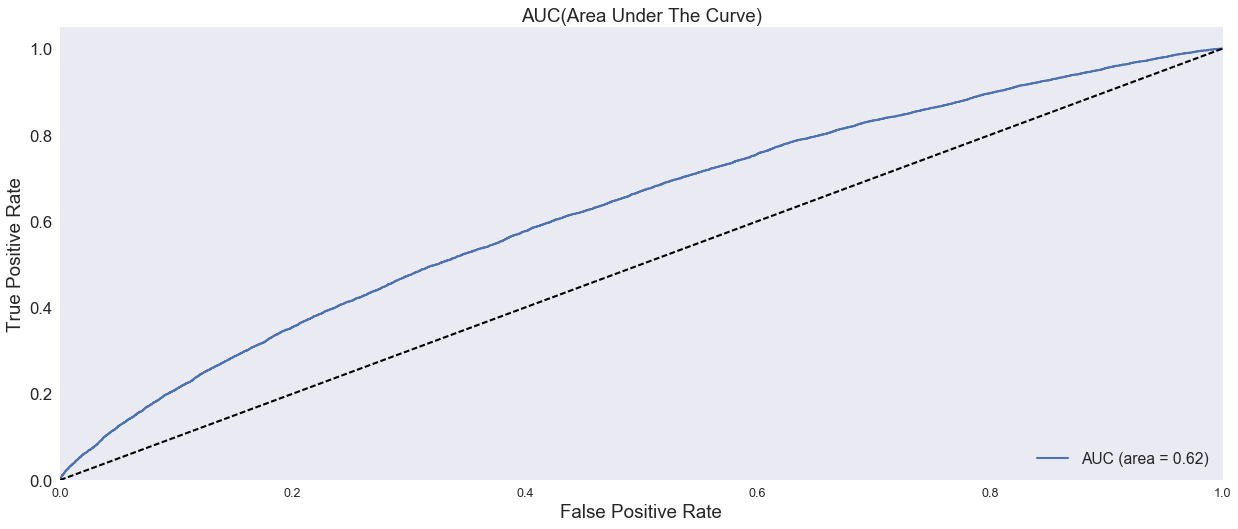

In [32]:
grafico_auc(modelo_rf4)

### IMPORTÂNCIA DAS FEATURES - MODELO RF4

In [33]:
#Alteração de alguns parâmetros para melhor impressão do gráfico
# Padronização da impressão dos gráficos
padrao={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [40, 25], 'axes.labelsize': 20,\
   'axes.titlesize': 25, 'font.size': 10, 'lines.linewidth': 8.0, 'lines.markersize': 3, 'legend.fontsize': 15,\
   'xtick.labelsize': 20, 'ytick.labelsize': 16} 
 
sns.set(style='dark',rc=padrao) 

Feature Ranking:
1. feature 34 (0.134104)
2. feature 4 (0.083186)
3. feature 20 (0.072356)
4. feature 16 (0.068815)
5. feature 24 (0.047756)
6. feature 19 (0.047138)
7. feature 27 (0.046669)
8. feature 33 (0.041562)
9. feature 6 (0.039220)
10. feature 5 (0.038969)
11. feature 2 (0.037827)
12. feature 23 (0.029870)
13. feature 21 (0.026122)
14. feature 15 (0.025664)
15. feature 14 (0.024968)
16. feature 36 (0.022871)
17. feature 35 (0.021307)
18. feature 22 (0.019025)
19. feature 18 (0.016668)
20. feature 0 (0.013424)
21. feature 26 (0.011137)
22. feature 31 (0.009613)
23. feature 25 (0.008493)
24. feature 1 (0.007839)
25. feature 46 (0.007435)
26. feature 3 (0.006812)
27. feature 47 (0.005792)
28. feature 50 (0.005473)
29. feature 32 (0.005192)
30. feature 37 (0.004939)
31. feature 29 (0.004821)
32. feature 38 (0.004800)
33. feature 41 (0.004620)
34. feature 43 (0.004601)
35. feature 7 (0.004545)
36. feature 44 (0.004463)
37. feature 28 (0.004342)
38. feature 39 (0.004215)
39. feature 

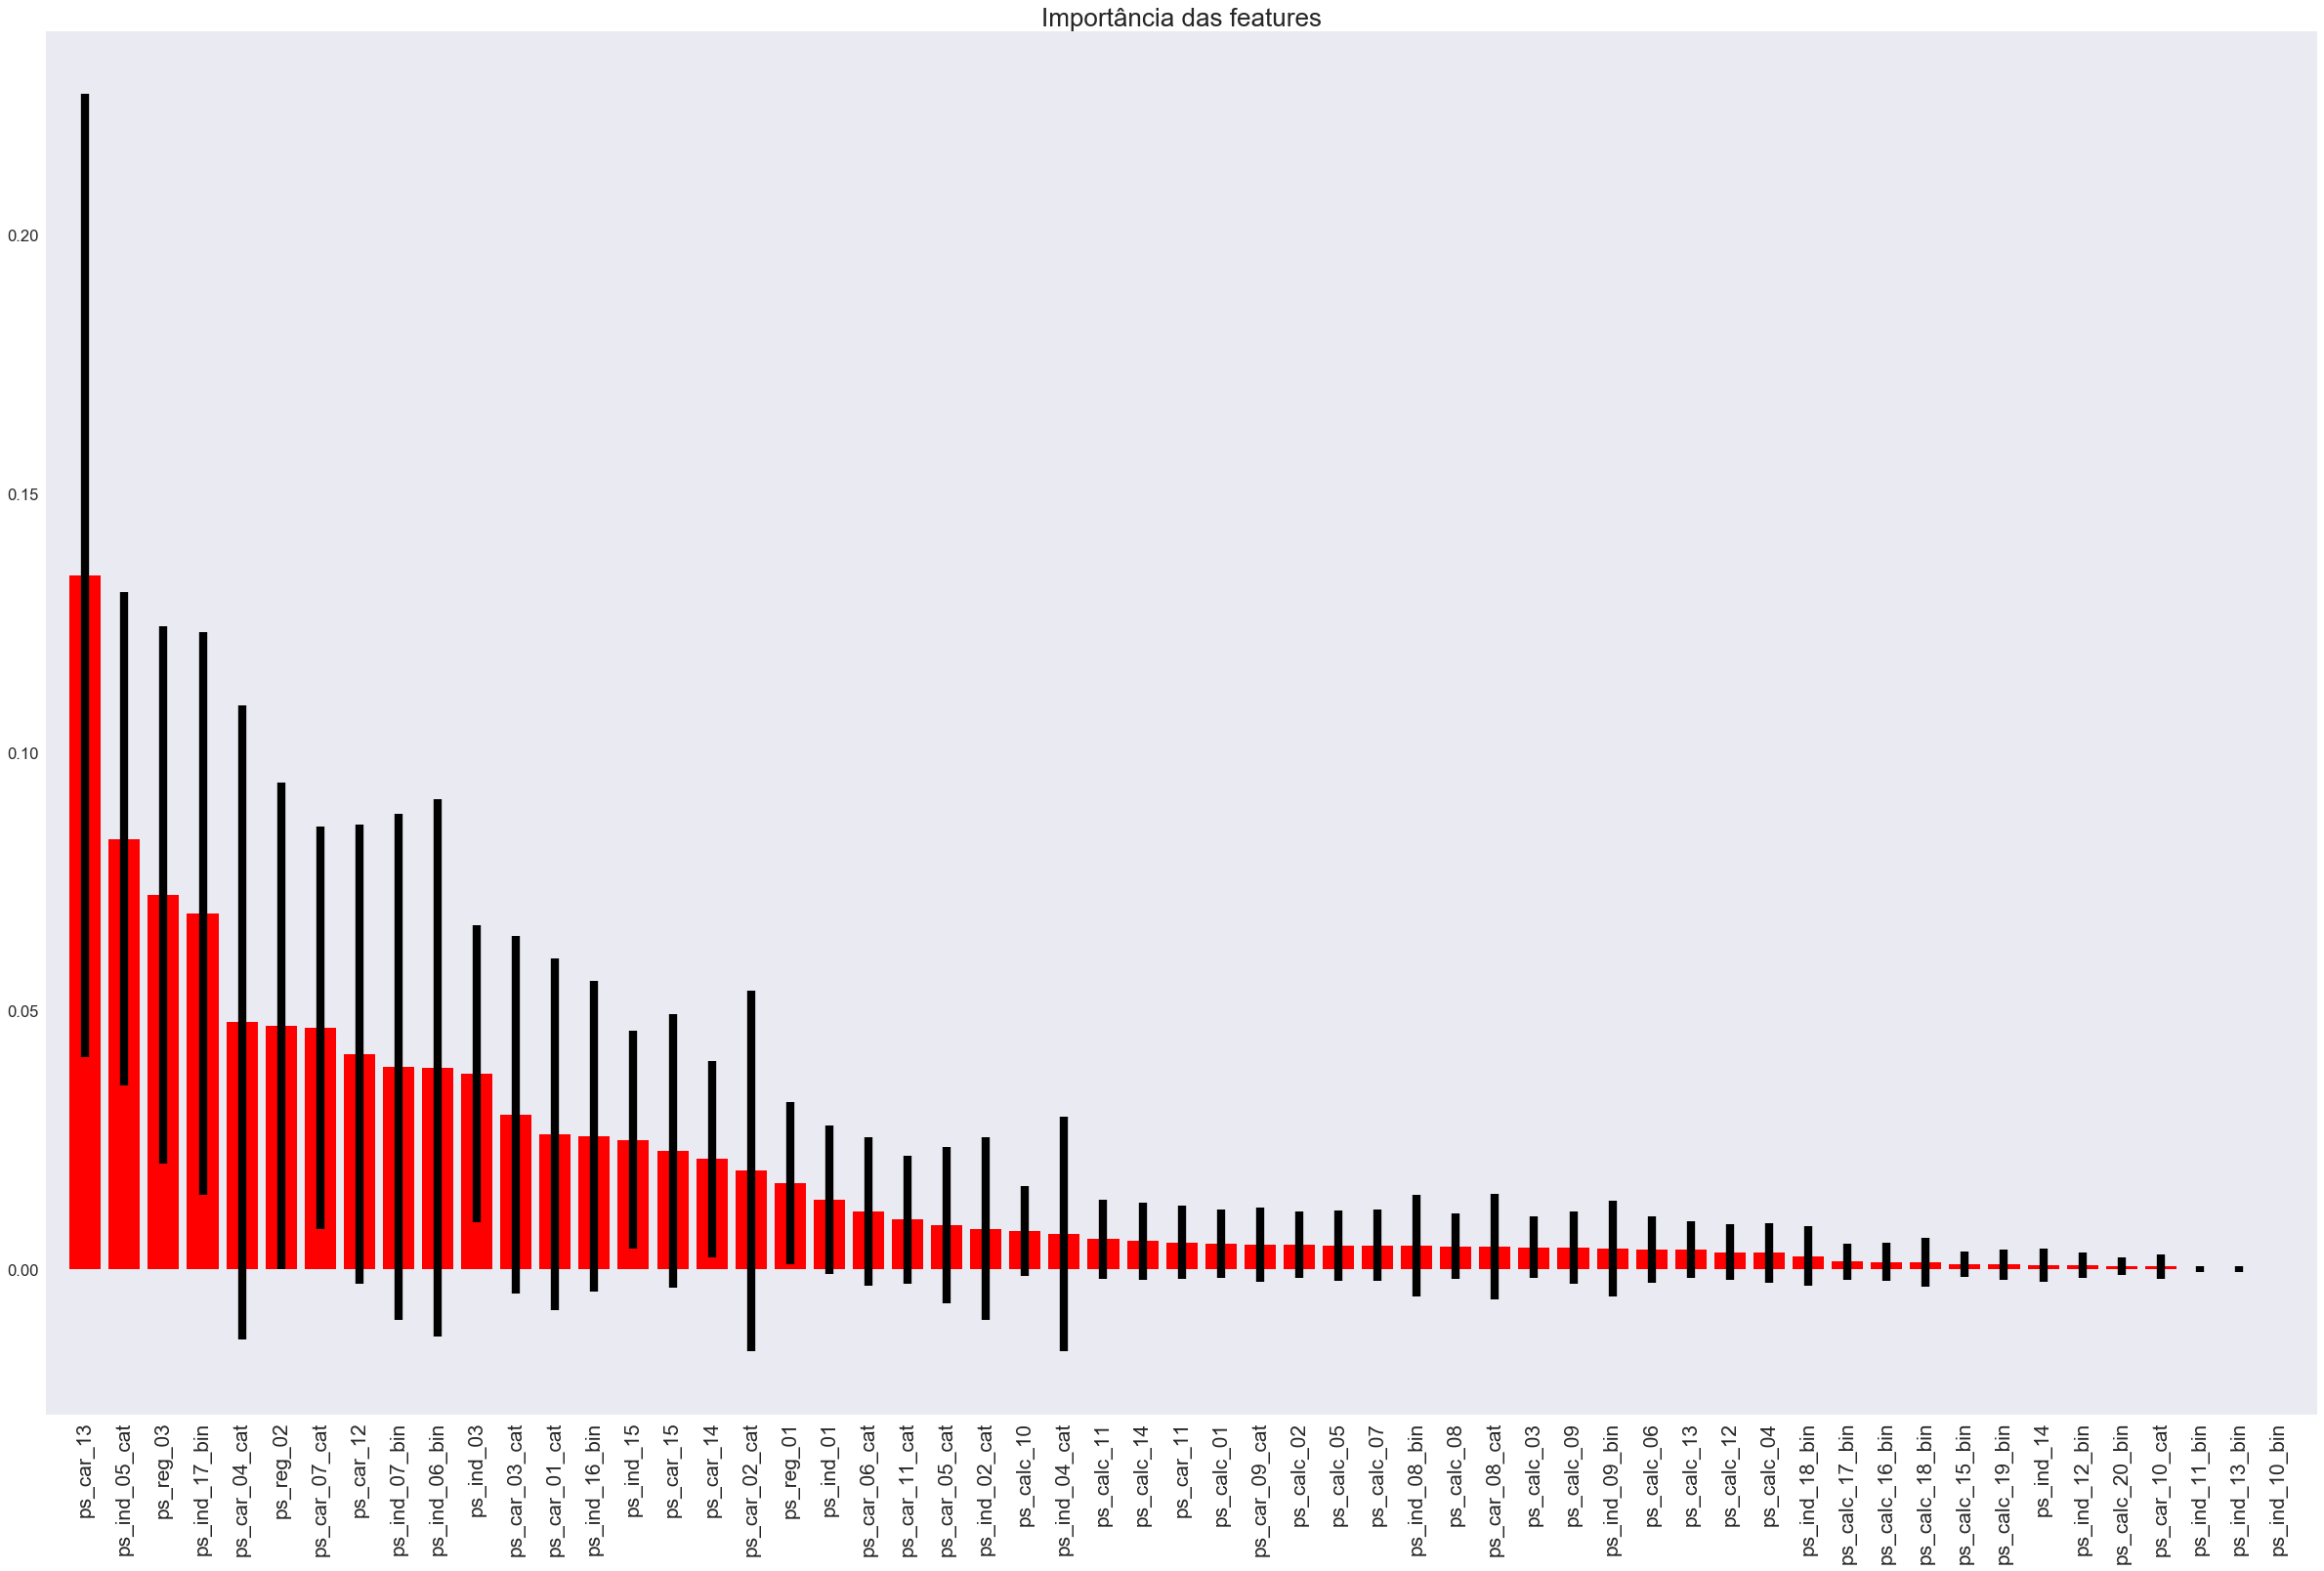

In [34]:
#código para gerar a importância das features no modelo rf4

importances = modelo_rf4.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelo_rf4.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature Ranking:")
lista=[] #criação de uma lista
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    lista.append(indices[f]) #lista adiciona indices
#features_importantes
nome_coluna = conjunto_treinamento.columns[lista]
# Plot the feature importances of the forest
plt.figure()
plt.title("Importância das features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
#imprimir nome das colunas nas vertical
plt.xticks(range(X.shape[1]), nome_coluna,rotation="vertical") 
plt.xlim([-1, X_train.shape[1]])
plt.show()

### ANÁLISE DO GRÁFICO - IMPORTÂNCIA DAS FEATURES

In [35]:
data = []
for col in conjunto_treinamento.columns:
    global grupo
    # Definindo a role
    if col == 'target':
        role = 'target'
    elif col == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # Definindo o nível
    if 'bin' in col or col == 'target':
        level = 'binaria'
    elif 'cat' in col or col == 'id':
        level = 'nominal' #categorica nominal
    elif conjunto_treinamento[col].dtype == np.float64:
        level = 'intervalar'
    elif conjunto_treinamento[col].dtype == np.int64:
        level = 'ordinal'
    else:
        pass
        
    # Definindo o grupo
        
    if col == 'target' or col == 'id':
        grupo='nogroup'
            
    elif 'ind' in col:
        grupo = 'ind'
    elif 'reg' in col:
        grupo = 'reg'
    elif 'car' in col:
        grupo = 'car'
    elif 'calc' in col:
        grupo = 'calc'
    else: 
        pass
            
    # Inicializando keep para verdadeiro para todas as variáveis exceto para id
    keep = True
    if col == 'id':
        keep = False

    # Definindo o tipo de dados
    dtype = conjunto_treinamento[col].dtype

    #Criando um dicionário que contém todos os metadados para a variável
    col_dict = {'nome_variavel': col,
                'role'   : role,
                'nivel'  : level,
                'keep'   : keep,
                'grupo'  : grupo,
                'tipo'  : dtype
                }
        
    data.append(col_dict)

metadados = pd.DataFrame(data, columns=['role', 'nivel', 'keep','nome_variavel', 'grupo', 'tipo'])
metadados.set_index('nome_variavel', inplace=True)
#Código por Bert Carremans e modificada por Cibele Castelo
#Referência:Bert Carremans.Data Preparation & Exploration. Disponível em:<https://www.kaggle.com/bertcarremans/data-preparation-exploration>

In [36]:
metadados.head()

,role,nivel,keep,grupo,tipo
nome_variavel,,,,,
ps_ind_01,input,ordinal,True,ind,int64
ps_ind_02_cat,input,nominal,True,ind,int64
ps_ind_03,input,ordinal,True,ind,int64
ps_ind_04_cat,input,nominal,True,ind,int64
ps_ind_05_cat,input,nominal,True,ind,int64


In [37]:
nome_coluna[:20]

Index(['ps_car_13', 'ps_ind_05_cat', 'ps_reg_03', 'ps_ind_17_bin',
       'ps_car_04_cat', 'ps_reg_02', 'ps_car_07_cat', 'ps_car_12',
       'ps_ind_07_bin', 'ps_ind_06_bin', 'ps_ind_03', 'ps_car_03_cat',
       'ps_car_01_cat', 'ps_ind_16_bin', 'ps_ind_15', 'ps_car_15', 'ps_car_14',
       'ps_car_02_cat', 'ps_reg_01', 'ps_ind_01'],
      dtype='object')

In [38]:
#Retorna as 20 variáveis que obtiveram a maior importância no modelo e armazena em uma lista
lista_20=list(nome_coluna[:20])

In [39]:
#Retorna as 5 variáveis que obtiveram menor importância no modelo e armazena em uma lista
lista_5=list(nome_coluna[-5:])

In [40]:
#Retorna as 10 variáveis que obtiveram menor importância no modelo e armazena em uma lista
lista_10=list(nome_coluna[-10:])

In [41]:
#trocar os índices pelas colunas e armazenar em metadados
metadados=metadados.transpose()

In [42]:
metadados['ps_car_10_cat'].values

array(['input', 'nominal', True, 'car', dtype('int64')], dtype=object)

In [67]:
#Traz todos os metadados das 20 variáveis que mais tem importância no modelo
metadados20=metadados[lista_20] 
metadados20

nome_variavel,ps_car_13,ps_ind_05_cat,ps_reg_03,ps_ind_17_bin,ps_car_04_cat,ps_reg_02,ps_car_07_cat,ps_car_12,ps_ind_07_bin,ps_ind_06_bin,ps_ind_03,ps_car_03_cat,ps_car_01_cat,ps_ind_16_bin,ps_ind_15,ps_car_15,ps_car_14,ps_car_02_cat,ps_reg_01,ps_ind_01
role,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input
nivel,intervalar,nominal,intervalar,binaria,nominal,intervalar,nominal,intervalar,binaria,binaria,ordinal,nominal,nominal,binaria,ordinal,intervalar,intervalar,nominal,intervalar,ordinal
keep,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
grupo,car,ind,reg,ind,car,reg,car,car,ind,ind,ind,car,car,ind,ind,car,car,car,reg,ind
tipo,float64,int64,float64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,int64


In [68]:
metadados20=metadados20.transpose()
metadados20

,role,nivel,keep,grupo,tipo
nome_variavel,,,,,
ps_car_13,input,intervalar,True,car,float64
ps_ind_05_cat,input,nominal,True,ind,int64
ps_reg_03,input,intervalar,True,reg,float64
ps_ind_17_bin,input,binaria,True,ind,int64
ps_car_04_cat,input,nominal,True,car,int64
ps_reg_02,input,intervalar,True,reg,float64
ps_car_07_cat,input,nominal,True,car,int64
ps_car_12,input,intervalar,True,car,float64
ps_ind_07_bin,input,binaria,True,ind,int64


In [69]:
print("Quantidade de variáveis do grupo car é igual a",sum(metadados20.grupo=='car'))
print("Quantidade de variáveis do grupo ind é igual a",sum(metadados20.grupo=='ind'))
print("Quantidade de variáveis do grupo reg é igual a",sum(metadados20.grupo=='reg'))
print("Quantidade de variáveis do grupo calc é igual a",sum(metadados20.grupo=='calc'))

Quantidade de variáveis do grupo car é igual a 9
Quantidade de variáveis do grupo ind é igual a 8
Quantidade de variáveis do grupo reg é igual a 3
Quantidade de variáveis do grupo calc é igual a 0


In [70]:
print("Quantidade de variáveis do tipo intervalar é igual a",sum(metadados20.nivel=='intervalar'))
print("Quantidade de variáveis do tipo nominal é igual a",sum(metadados20.nivel=='nominal'))
print("Quantidade de variáveis do tipo binaria é igual a",sum(metadados20.nivel=='binaria'))
print("Quantidade de variáveis do tipo ordinal é igual a",sum(metadados20.nivel=='ordinal'))

Quantidade de variáveis do tipo intervalar é igual a 7
Quantidade de variáveis do tipo nominal é igual a 6
Quantidade de variáveis do tipo binaria é igual a 4
Quantidade de variáveis do tipo ordinal é igual a 3


In [71]:
print("Quantidade de variáveis int64 é igual a",sum(metadados20.tipo=='int64'))
print("Quantidade de variáveis float64 é igual a",sum(metadados20.tipo=='float64'))


Quantidade de variáveis int64 é igual a 13
Quantidade de variáveis float64 é igual a 7


### REFINAMENTO DO MODELO - Remoção de Outliers

Será verificado alguns outliers para as primeiras variáveis que são consideradas as mais relevantes para o modelo. Não irá ser retirada nenhuma linha que contém target=1, pois isso diminuiria ainda mais a porcentagem de pessoas que acionaram o sinistro, por isso somente só será removido outliers somente que possue "target"= 0.

In [48]:
#Armazendo na váriavel X todas as colunas, exceto a da variável alvo "target" e "id" que são 
#números de identificação ordenados que visam substituir o identificador do cliente.
conjunto_treinamento = full_data.drop(['target',"id"], axis=1)
conjunto_teste = full_data['target']

In [49]:
#Pega os outliers da variável "ps_car_12"
lista=conjunto_treinamento[conjunto_treinamento['ps_car_12'] <= 0.2]
#Armazena em uma lista
lista=lista.index.values
lista

array([  3185,   3621,   9515,  22646,  26090,  58639,  77059,  87611,
       106635, 108120, 148835, 152099, 160782, 193711, 194386, 208585,
       216031, 225009, 239647, 245831, 263937, 265419, 267195, 271854,
       282311, 286129, 298018, 302799, 302975, 306879, 308875, 310551,
       321848, 323320, 354638, 355008, 369341, 373967, 378501, 439757,
       439868, 443248, 453835, 464658, 484890, 485820, 507505, 510865,
       514445, 515771, 527494, 543747, 552435, 554758, 556328, 568838,
       575272, 579029, 591450, 592046, 594806], dtype=int64)

In [50]:
#criação de uma função para garantir que os valores da lista não contenham target=1. Ou seja,
#vão ser mantidos na lista somente os valores com target=0 para futuramente serem eliminados
#do modelo.
def verificar_target(lista):
    lista_oficial=[]
    for num in lista:
        if conjunto_teste.loc[num] == 0: #não pega row com target=1
            #print(num)
            lista_oficial.append(num)
    return lista_oficial

In [51]:
lista=verificar_target(lista)
#lista

In [52]:
#verificar se os valores que tem target = 1, foram excluídos mesmo da lista
#lista.index(26090) #normal, valor excluído da lista por isto o erro.

### REFINAMENTO - Exclusão de outliers

In [53]:
#exclusão dos outliers encontrados na "lista"
conjunto_treinamento=conjunto_treinamento.drop(lista)
conjunto_teste=conjunto_teste.drop(lista)

### REFINAMENTO - Exclusão das últimas colunas

In [54]:
#Exclusão das 5 últimas colunas - pontuação não melhorou
#conjunto_treinamento=conjunto_treinamento.drop(lista_5,axis=1)
#Exclusão das 10 últimas colunas - pontuação não melhorou
#conjunto_treinamento=conjunto_treinamento.drop(lista_10,axis=1)

### DIVISÂO DOS DADOS - conjunto de treinamento e conjunto de teste

In [55]:
#importação da técnica StratifiedKFold
from sklearn.model_selection import StratifiedKFold

X = np.array(conjunto_treinamento)
y = np.array(conjunto_teste)

#Divisão do conjunto de dados de treinamento em: conjunto de treinamento e teste
skf = StratifiedKFold(n_splits=3,random_state=2017,shuffle=True)

for train_index, test_index in skf.split(X, y): #split é tipo train_test_split. dividindo os datasets em train e test
    print("train:", train_index, "Train:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

train: [     0      1      2 ..., 595150 595152 595153] Train: [     3      4      8 ..., 595146 595148 595151]
train: [     2      3      4 ..., 595151 595152 595153] Train: [     0      1      7 ..., 595145 595149 595150]
train: [     0      1      3 ..., 595149 595150 595151] Train: [     2      5      6 ..., 595147 595152 595153]


### TREINAMENTO DO MODELO - RF5

In [56]:
#Modificação dos parâmetros
#Modelo com a retirada de outliers - lista
parametros_rf = {'n_estimators':300, 
                 'max_depth': 6 ,
                 'min_samples_split': 60, 
                 'min_samples_leaf': 25,
                 'random_state':2017
            } 

#Treinamento do modelo_rf5
modelo_rf5 = RandomForestClassifier(**parametros_rf)
modelo_rf5.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=2017,
            verbose=0, warm_start=False)

In [57]:
pontuacao(modelo_rf5)

Pontuações da Validação Cruzada: [ 0.6340421   0.61639751  0.62920053  0.62206829  0.63139019]
Pontuação AUC: 0.627
Pontuação Gini:  0.253239448477


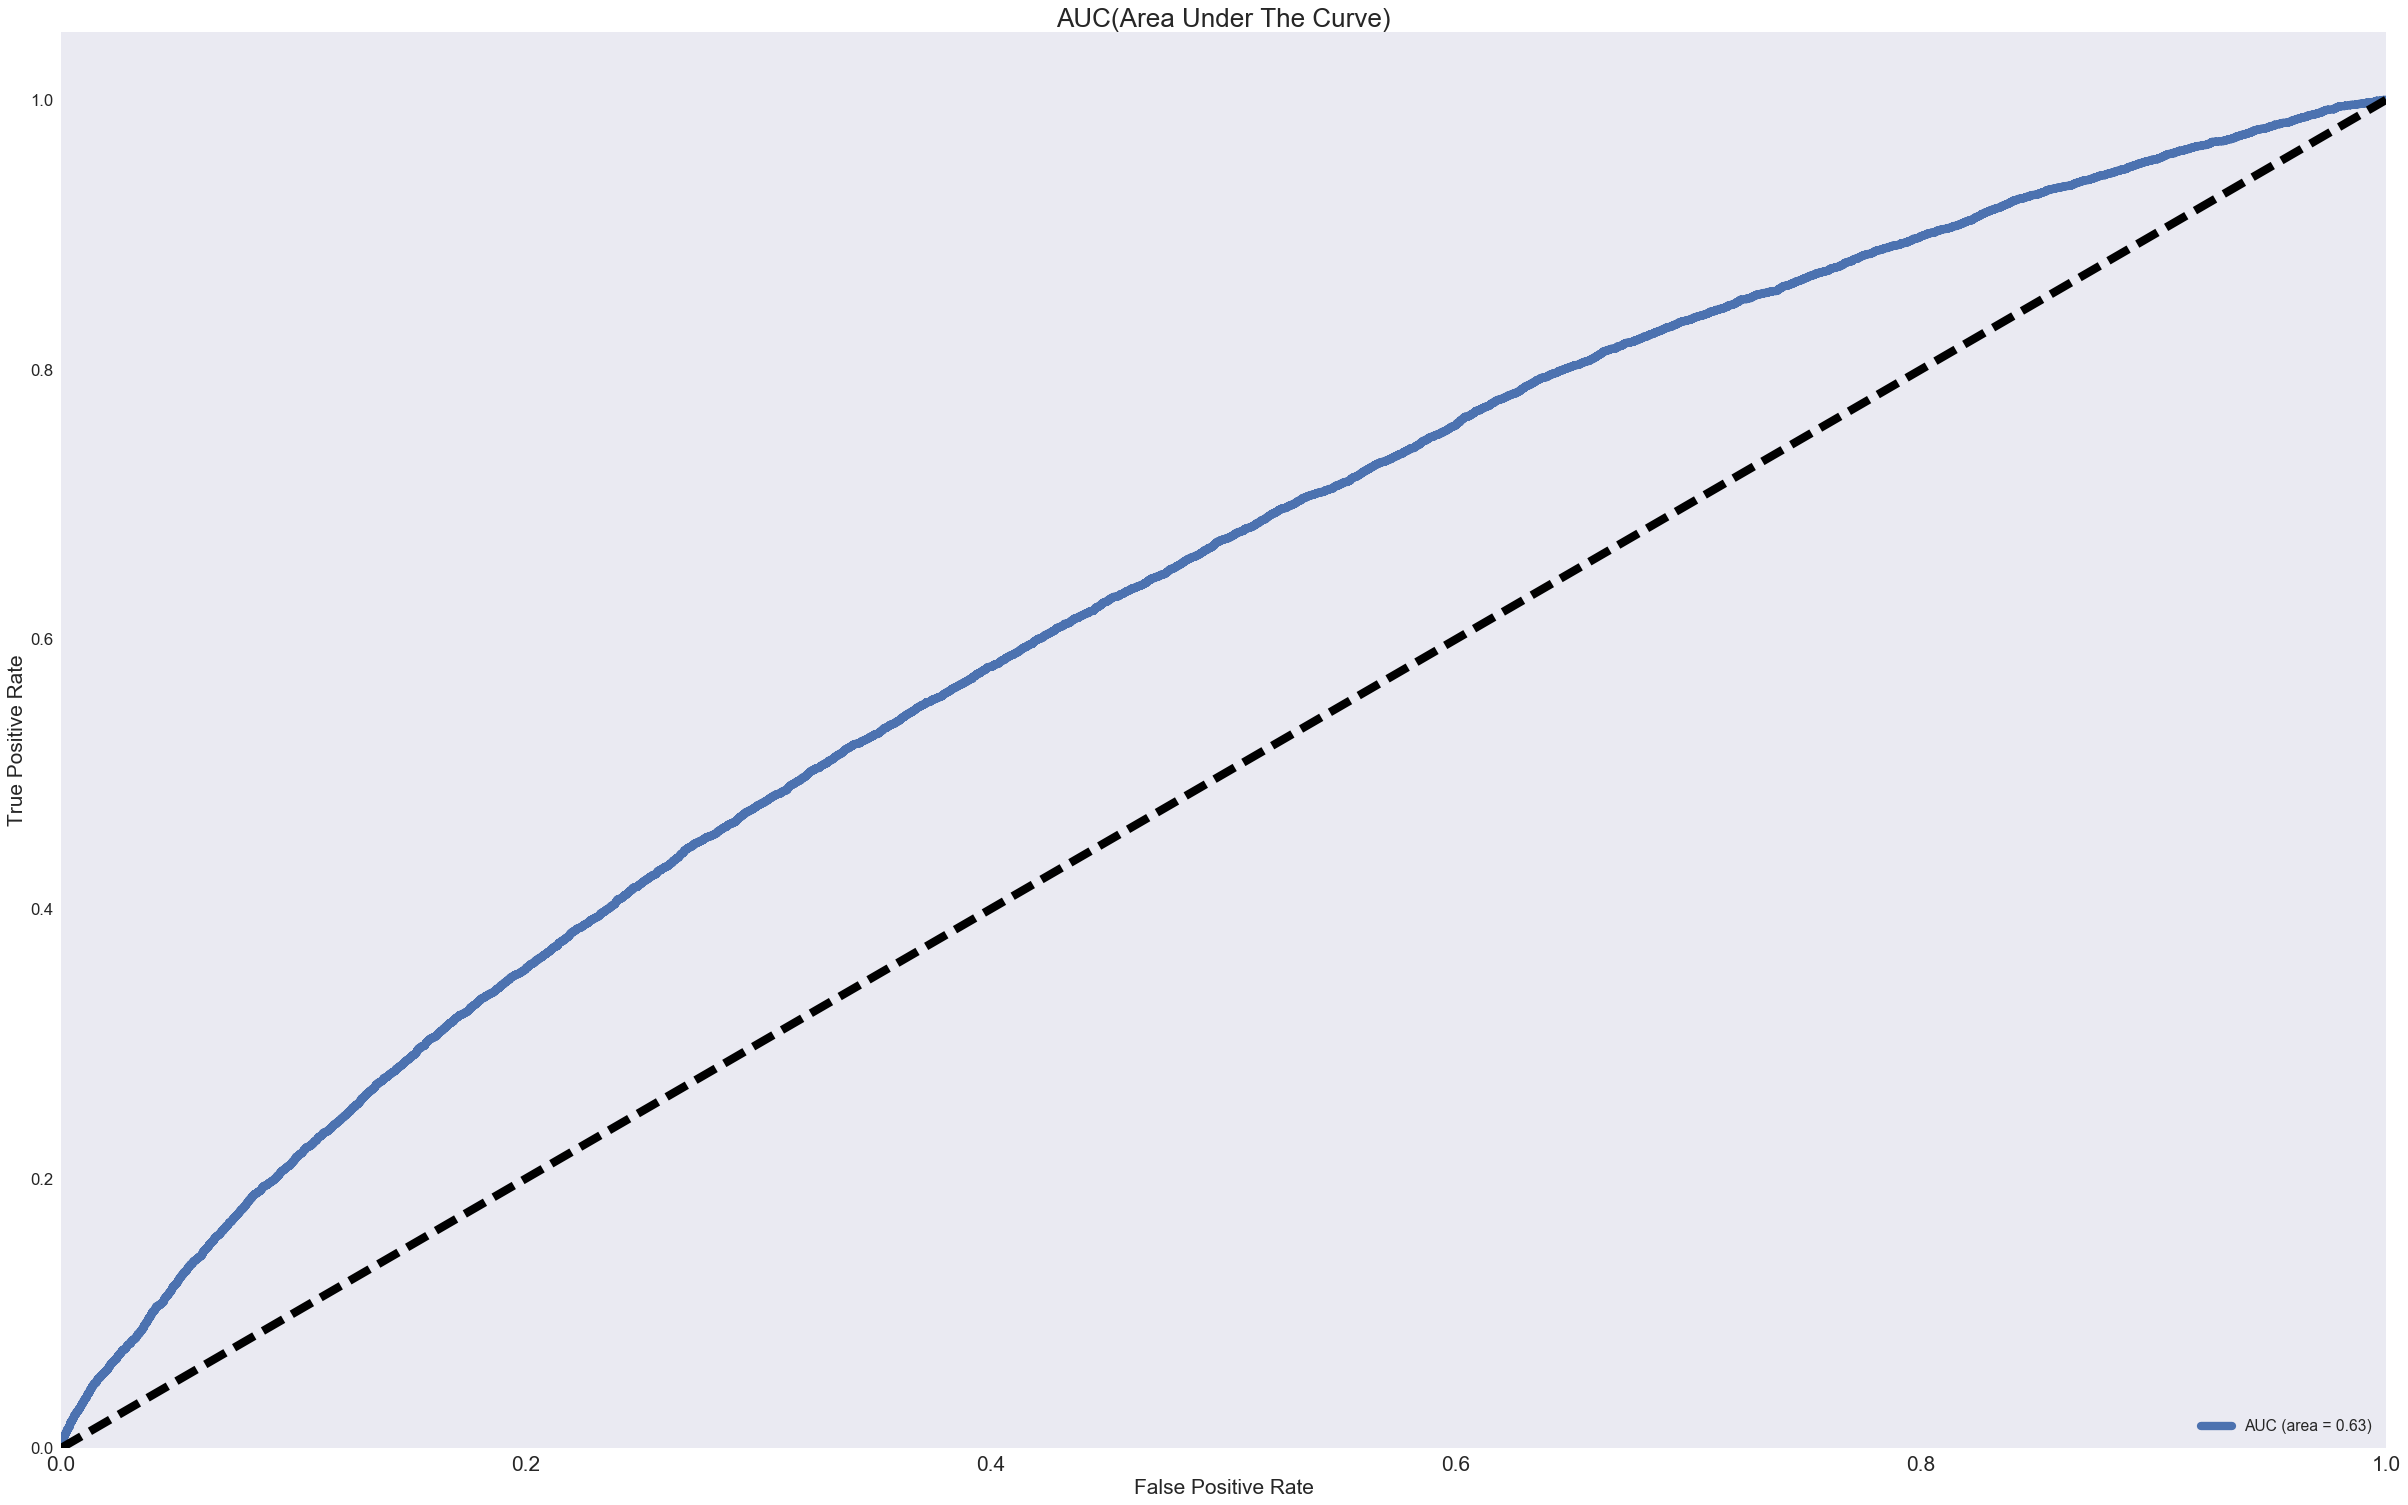

In [58]:
grafico_auc(modelo_rf5)

### GRID-SEARCH - TREINAMENTO DO MODELO  RF6

In [62]:
#Modificação dos parâmetros

#Treinamento do modelo_rf4
modelo_rf6 = RandomForestClassifier(random_state=2017)
modelo_rf6.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=2017,
            verbose=0, warm_start=False)

In [63]:
from sklearn.model_selection import GridSearchCV

params_map = [{
         'n_estimators': [300],
          'max_depth': [6,8], 
          'min_samples_split': [60], 
          'min_samples_leaf':[25]}
        ]

gsv = GridSearchCV(modelo_rf6, params_map, scoring='roc_auc',verbose=10)
gsv.fit(X_train, y_train)
print("Melhor configuração de parâmetros",gsv.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] max_depth=6, min_samples_leaf=25, min_samples_split=60, n_estimators=300 
[CV]  max_depth=6, min_samples_leaf=25, min_samples_split=60, n_estimators=300, score=0.627353, total= 2.5min
[CV] max_depth=6, min_samples_leaf=25, min_samples_split=60, n_estimators=300 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=25, min_samples_split=60, n_estimators=300, score=0.625189, total= 2.5min
[CV] max_depth=6, min_samples_leaf=25, min_samples_split=60, n_estimators=300 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.3min remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=25, min_samples_split=60, n_estimators=300, score=0.625085, total= 2.5min
[CV] max_depth=8, min_samples_leaf=25, min_samples_split=60, n_estimators=300 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.9min remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=25, min_samples_split=60, n_estimators=300, score=0.629784, total= 3.1min
[CV] max_depth=8, min_samples_leaf=25, min_samples_split=60, n_estimators=300 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.1min remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=25, min_samples_split=60, n_estimators=300, score=0.628861, total= 3.1min
[CV] max_depth=8, min_samples_leaf=25, min_samples_split=60, n_estimators=300 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 14.4min remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=25, min_samples_split=60, n_estimators=300, score=0.627662, total= 3.1min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 17.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 17.7min finished


Melhor configuração de parâmetros {'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 60, 'n_estimators': 300}


In [64]:
#Modificação dos parâmetros
#Modelo com a retirada de outliers - lista
parametros_rf = {'n_estimators':300, 
                 'max_depth': 8 ,
                 'min_samples_split': 60, 
                 'min_samples_leaf': 25,
                 'random_state':2017
            } 

#Treinamento do modelo_rf6
modelo_rf6 = RandomForestClassifier(**parametros_rf)
modelo_rf6.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=2017,
            verbose=0, warm_start=False)

In [65]:
pontuacao(modelo_rf6)

Pontuações da Validação Cruzada: [ 0.63198833  0.61750657  0.63076098  0.62408368  0.63331137]
Pontuação AUC: 0.628
Pontuação Gini:  0.255060374577


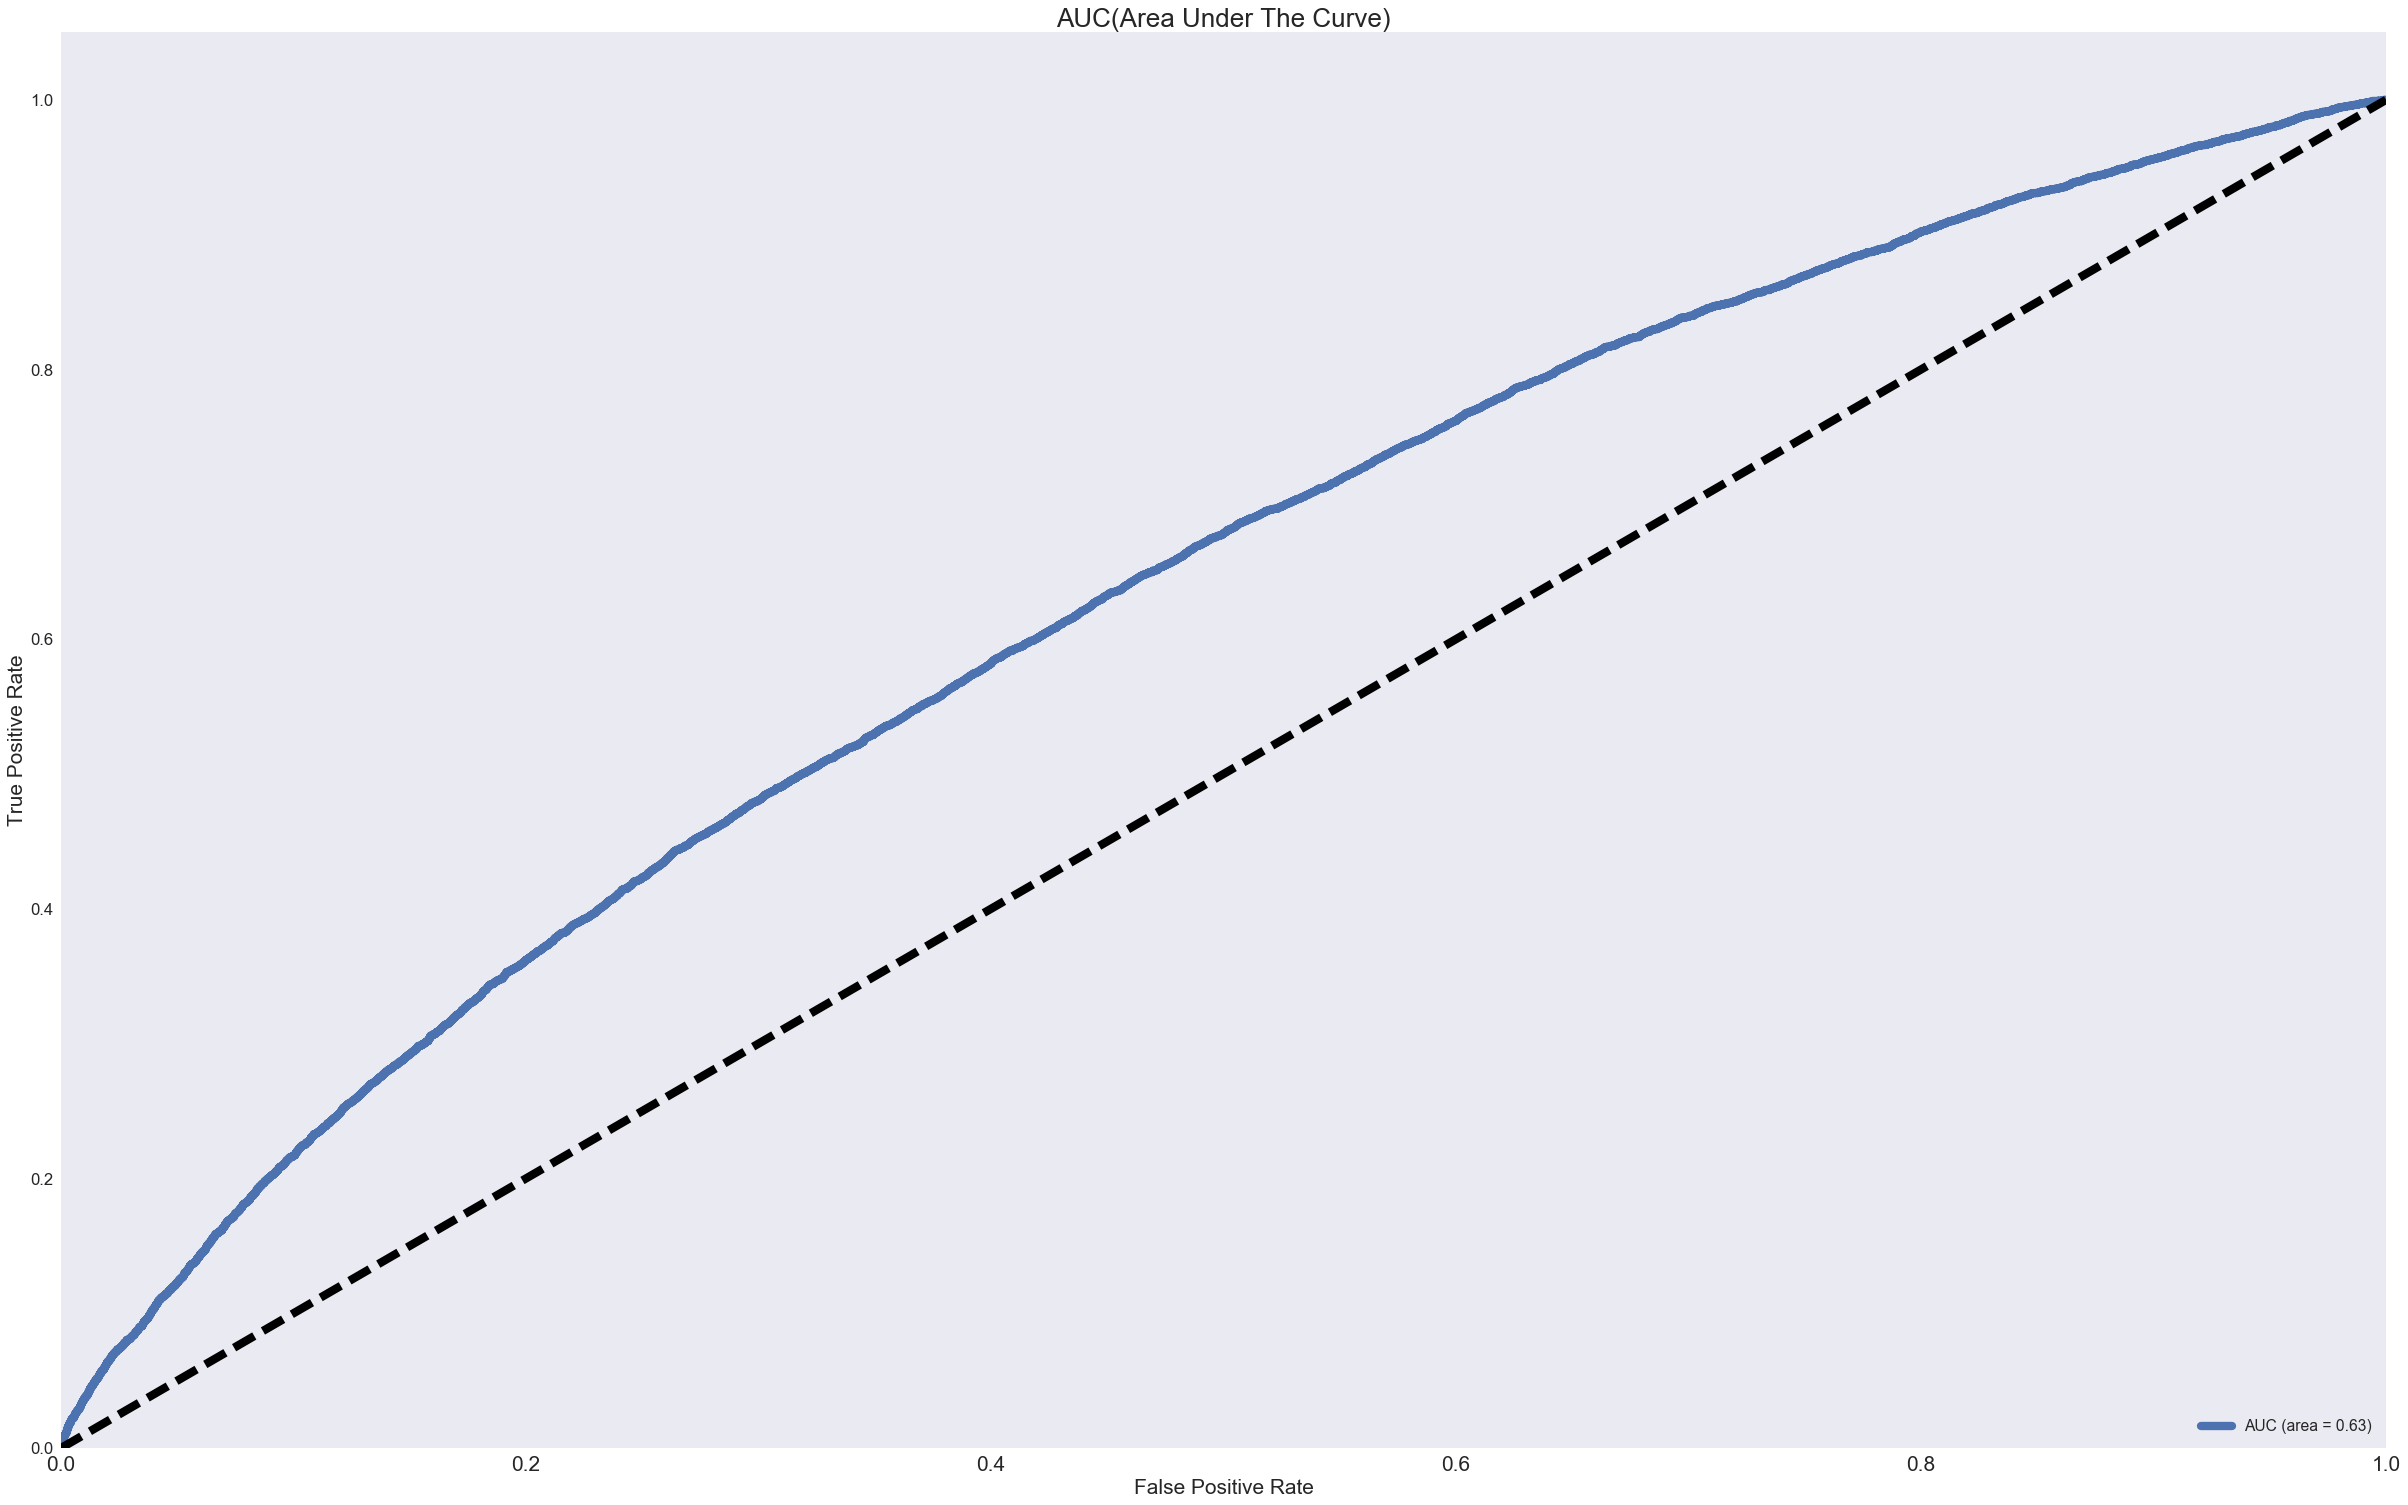

In [66]:
grafico_auc(modelo_rf6) #0.255 no site da kaggle

### Visualização Forma-Livre

Feature Ranking:
1. feature 34 (0.114956)
2. feature 4 (0.068919)
3. feature 20 (0.065957)
4. feature 16 (0.049373)
5. feature 2 (0.042844)
6. feature 19 (0.040683)
7. feature 27 (0.036872)
8. feature 33 (0.032797)
9. feature 35 (0.031608)
10. feature 24 (0.031130)
11. feature 14 (0.030856)
12. feature 21 (0.026734)
13. feature 23 (0.025134)
14. feature 5 (0.025101)
15. feature 36 (0.024877)
16. feature 6 (0.024430)
17. feature 18 (0.020887)
18. feature 15 (0.017555)
19. feature 0 (0.017521)
20. feature 31 (0.016679)
21. feature 26 (0.016078)
22. feature 46 (0.015668)
23. feature 50 (0.013699)
24. feature 37 (0.013224)
25. feature 47 (0.013002)
26. feature 39 (0.012451)
27. feature 38 (0.012375)
28. feature 22 (0.010987)
29. feature 49 (0.010775)
30. feature 43 (0.009532)
31. feature 44 (0.009293)
32. feature 42 (0.009173)
33. feature 41 (0.008895)
34. feature 25 (0.008841)
35. feature 48 (0.008745)
36. feature 45 (0.008610)
37. feature 29 (0.008201)
38. feature 1 (0.008187)
39. featur

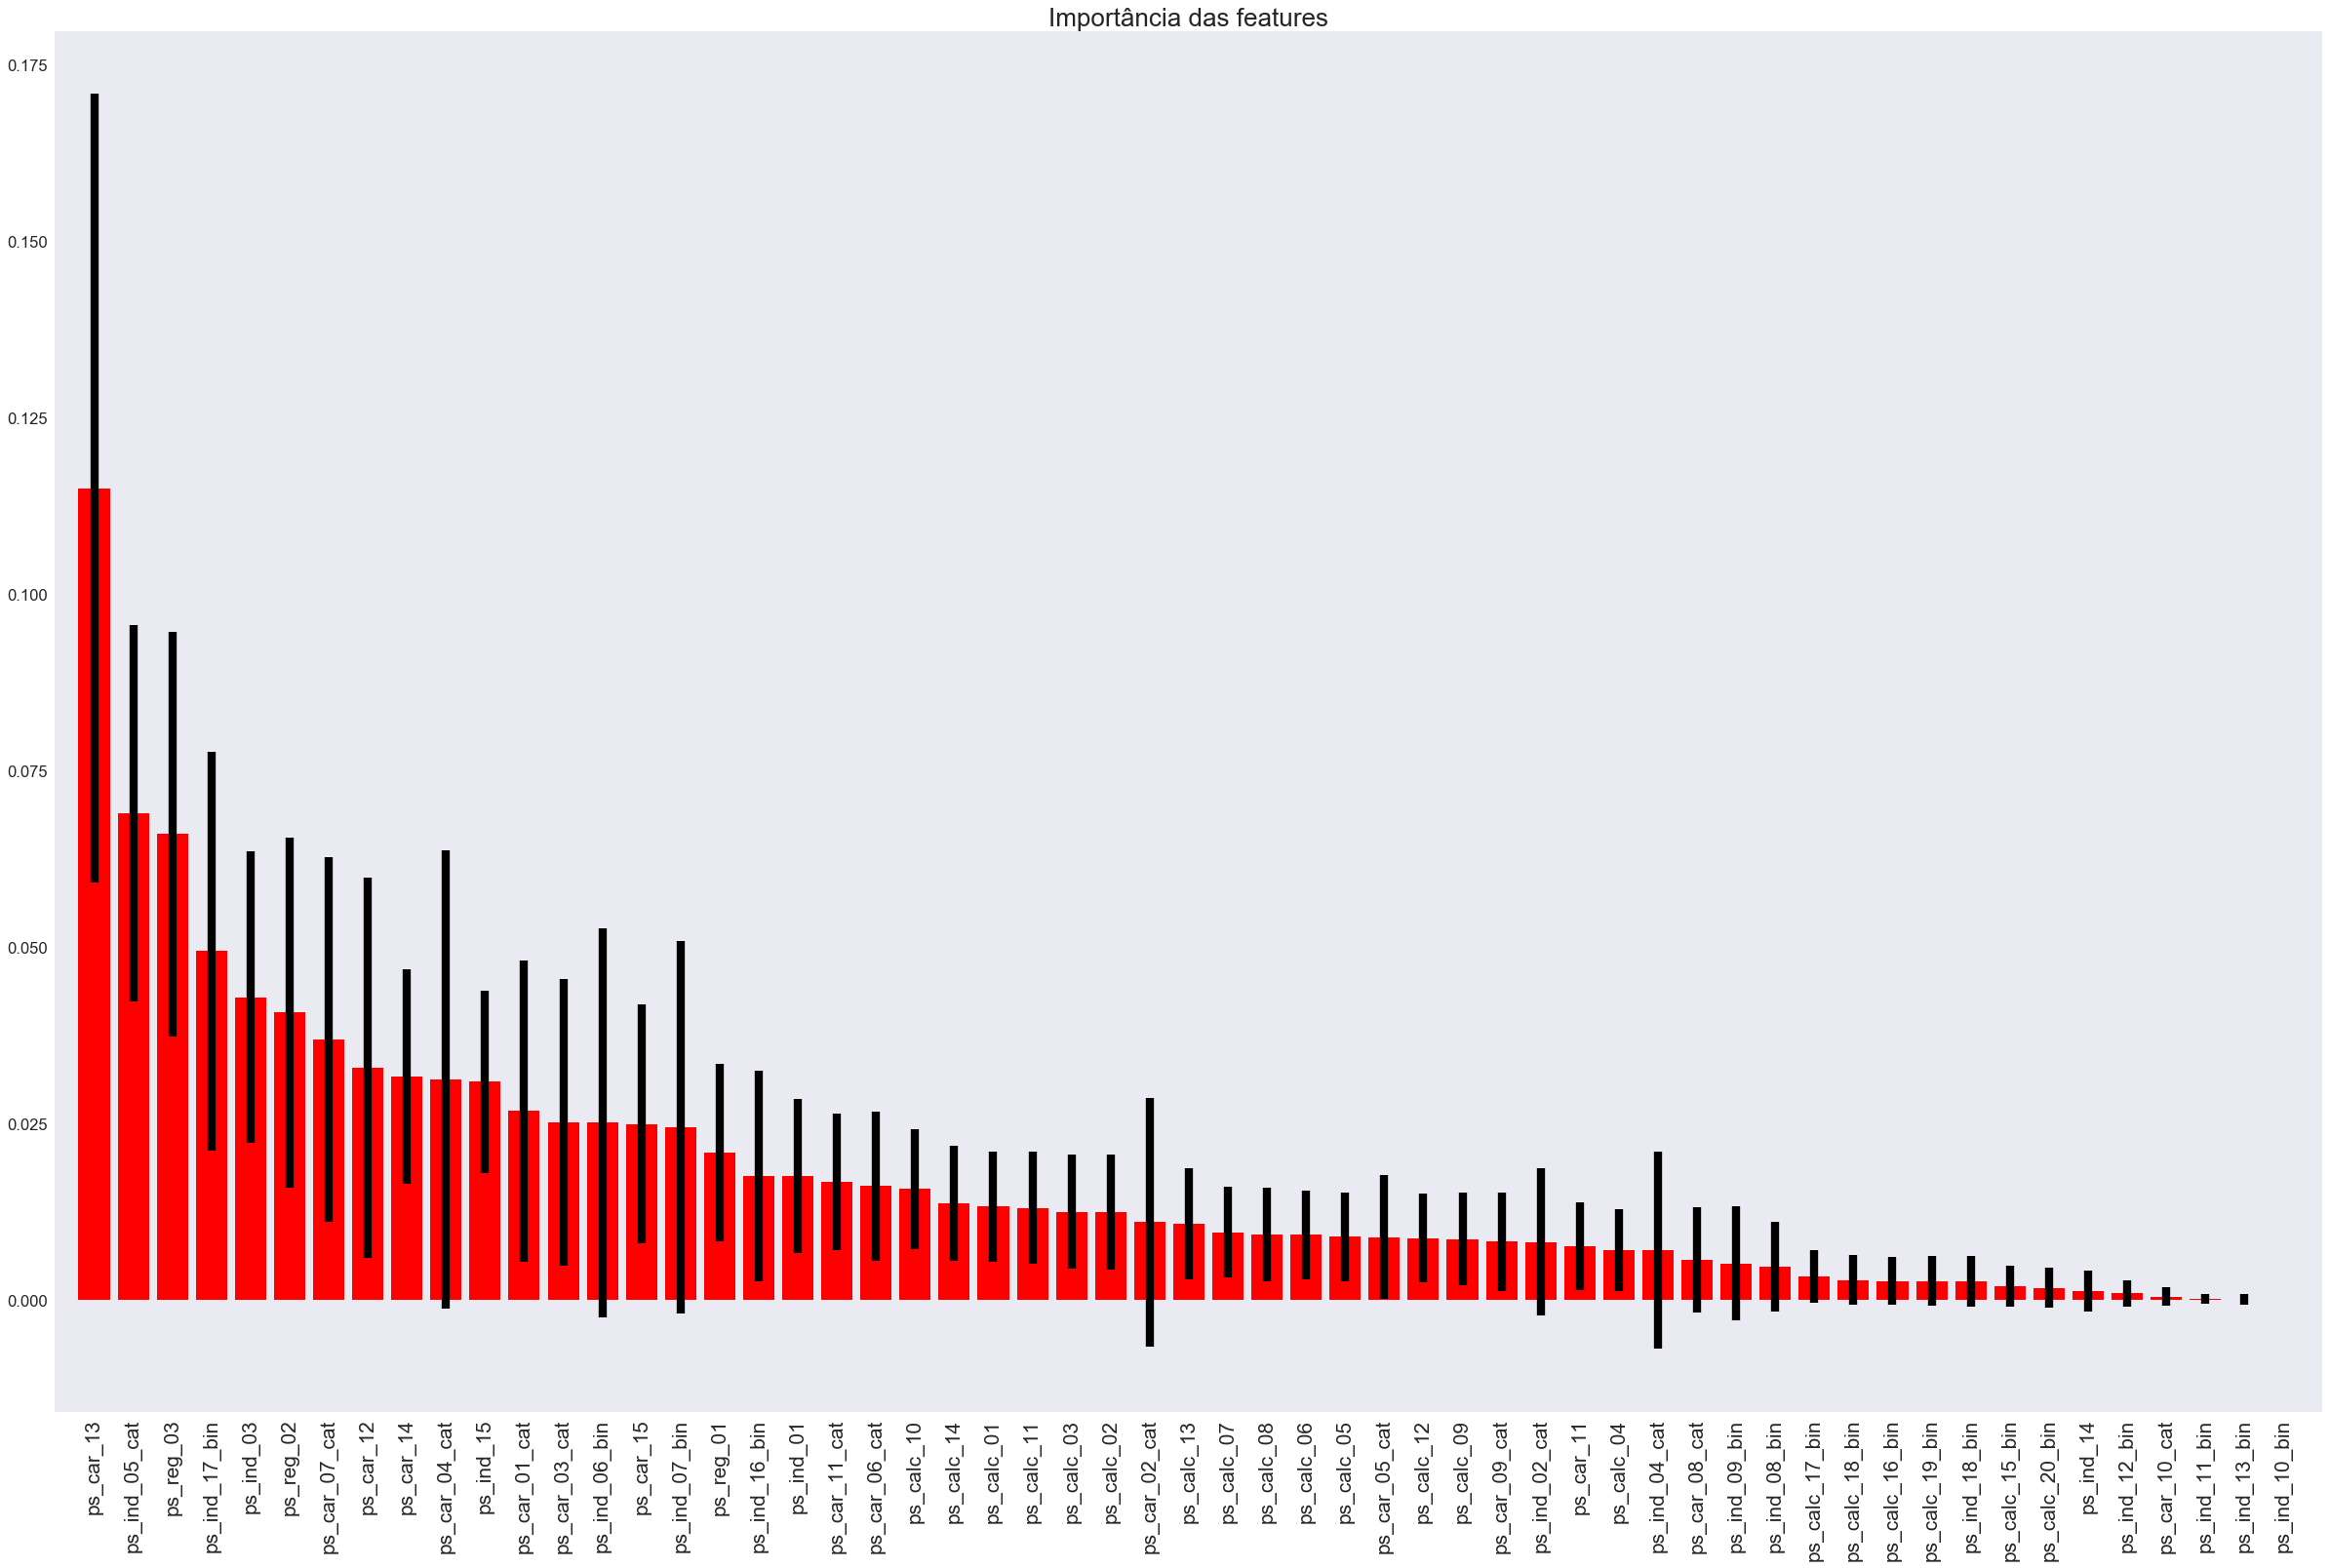

In [81]:
#código para gerar a importância das features no modelo rf6

importances = modelo_rf6.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelo_rf6.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature Ranking:")
lista=[] #criação de uma lista
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    lista.append(indices[f]) #lista adiciona indices
#features_importantes
nome_coluna = conjunto_treinamento.columns[lista]
# Plot the feature importances of the forest
plt.figure()
plt.title("Importância das features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
#imprimir nome das colunas nas vertical
plt.xticks(range(X.shape[1]), nome_coluna,rotation="vertical") 
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [82]:
#Retorna as 20 variáveis que obtiveram a maior importância no modelo e armazena em uma lista
lista_20=list(nome_coluna[:20])

In [83]:
#Traz todos os metadados das 20 variáveis que mais tem importância no modelo
metadados20=metadados[lista_20] 
metadados20

nome_variavel,ps_car_13,ps_ind_05_cat,ps_reg_03,ps_ind_17_bin,ps_ind_03,ps_reg_02,ps_car_07_cat,ps_car_12,ps_car_14,ps_car_04_cat,ps_ind_15,ps_car_01_cat,ps_car_03_cat,ps_ind_06_bin,ps_car_15,ps_ind_07_bin,ps_reg_01,ps_ind_16_bin,ps_ind_01,ps_car_11_cat
role,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input,input
nivel,intervalar,nominal,intervalar,binaria,ordinal,intervalar,nominal,intervalar,intervalar,nominal,ordinal,nominal,nominal,binaria,intervalar,binaria,intervalar,binaria,ordinal,nominal
keep,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
grupo,car,ind,reg,ind,ind,reg,car,car,car,car,ind,car,car,ind,car,ind,reg,ind,ind,car
tipo,float64,int64,float64,int64,int64,float64,int64,float64,float64,int64,int64,int64,int64,int64,float64,int64,float64,int64,int64,int64


In [84]:
metadados20=metadados20.transpose()
metadados20

,role,nivel,keep,grupo,tipo
nome_variavel,,,,,
ps_car_13,input,intervalar,True,car,float64
ps_ind_05_cat,input,nominal,True,ind,int64
ps_reg_03,input,intervalar,True,reg,float64
ps_ind_17_bin,input,binaria,True,ind,int64
ps_ind_03,input,ordinal,True,ind,int64
ps_reg_02,input,intervalar,True,reg,float64
ps_car_07_cat,input,nominal,True,car,int64
ps_car_12,input,intervalar,True,car,float64
ps_car_14,input,intervalar,True,car,float64


In [85]:
print("Quantidade de variáveis do grupo car é igual a",sum(metadados20.grupo=='car'))
print("Quantidade de variáveis do grupo ind é igual a",sum(metadados20.grupo=='ind'))
print("Quantidade de variáveis do grupo reg é igual a",sum(metadados20.grupo=='reg'))
print("Quantidade de variáveis do grupo calc é igual a",sum(metadados20.grupo=='calc'))
print("Quantidade de variáveis do tipo intervalar é igual a",sum(metadados20.nivel=='intervalar'))
print("Quantidade de variáveis do tipo nominal é igual a",sum(metadados20.nivel=='nominal'))
print("Quantidade de variáveis do tipo binaria é igual a",sum(metadados20.nivel=='binaria'))
print("Quantidade de variáveis do tipo ordinal é igual a",sum(metadados20.nivel=='ordinal'))
print("Quantidade de variáveis int64 é igual a",sum(metadados20.tipo=='int64'))
print("Quantidade de variáveis float64 é igual a",sum(metadados20.tipo=='float64'))

Quantidade de variáveis do grupo car é igual a 9
Quantidade de variáveis do grupo ind é igual a 8
Quantidade de variáveis do grupo reg é igual a 3
Quantidade de variáveis do grupo calc é igual a 0
Quantidade de variáveis do tipo intervalar é igual a 7
Quantidade de variáveis do tipo nominal é igual a 6
Quantidade de variáveis do tipo binaria é igual a 4
Quantidade de variáveis do tipo ordinal é igual a 3
Quantidade de variáveis int64 é igual a 13
Quantidade de variáveis float64 é igual a 7


### Preparação dos dados - Conjunto de Testes - "test.csv"

In [73]:
#armazenando os valores da coluna id do teste
id_test = full_data_test['id'].values

#Excluindo a váriavel "id" do conjunto de testes também.
full_data_test=full_data_test.drop(['id'], axis = 1)

#drop na váriavel ps_car_13 que possui 70% dos dados nulos
#full_data_test=full_data_test.drop(['ps_car_03_cat'], axis = 1)

### Criação da sample_submission para ser enviado para o site da competição Kaggle, utilizando os modelos preditivos criados.

In [76]:
#modelo_rf1
submission=pd.DataFrame(columns=['id','target'])
submission['target']=modelo_rf1.predict_proba(full_data_test)[:,1]
submission['id']=id_test
submission.to_csv("sample_submission_modelo_rf1.csv", index=False)

In [77]:
#modelo_rf2
submission=pd.DataFrame(columns=['id','target'])
submission['target']=modelo_rf2.predict_proba(full_data_test)[:,1]
submission['id']=id_test
submission.to_csv("sample_submission_modelo_rf2.csv", index=False)

In [78]:
#modelo_rf3
submission=pd.DataFrame(columns=['id','target'])
submission['target']=modelo_rf3.predict_proba(full_data_test)[:,1]
submission['id']=id_test
submission.to_csv("sample_submission_modelo_rf3.csv", index=False)

In [79]:
#modelo_rf4
submission=pd.DataFrame(columns=['id','target'])
submission['target']=modelo_rf4.predict_proba(full_data_test)[:,1]
submission['id']=id_test
submission.to_csv("sample_submission_modelo_rf4.csv", index=False)

In [80]:
#modelo_rf5
submission=pd.DataFrame(columns=['id','target'])
submission['target']=modelo_rf5.predict_proba(full_data_test)[:,1]
submission['id']=id_test
submission.to_csv("sample_submission_modelo_rf5.csv", index=False)

In [74]:
#modelo_rf6
submission=pd.DataFrame(columns=['id','target'])
submission['target']=modelo_rf6.predict_proba(full_data_test)[:,1]
submission['id']=id_test
submission.to_csv("sample_submission_modelo_rf6.csv", index=False)
#pd.read_csv('sample_submission_modelo_rf6.csv')